<a href="https://colab.research.google.com/github/luthfiyahastutiningtyas/ecommerce-analysis/blob/main/E_commerce_Order_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract Data from Kaggle**

In [ ]:
!pip install kaggle
from google.colab import files

files.upload()  # upload kaggle.json dari akun Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d bytadit/ecommerce-order-dataset
!unzip "ecommerce-order-dataset.zip" "Ecommerce Order Dataset/train/*" -d dataset
!ls dataset/"Ecommerce Order Dataset"/train

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/bytadit/ecommerce-order-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/14.5M [00:00<?, ?B/s]
100% 14.5M/14.5M [00:00<00:00, 975MB/s]
Archive:  ecommerce-order-dataset.zip
  inflating: dataset/Ecommerce Order Dataset/train/df_Customers.csv  
  inflating: dataset/Ecommerce Order Dataset/train/df_OrderItems.csv  
  inflating: dataset/Ecommerce Order Dataset/train/df_Orders.csv  
  inflating: dataset/Ecommerce Order Dataset/train/df_Payments.csv  
  inflating: dataset/Ecommerce Order Dataset/train/df_Products.csv  
df_Customers.csv   df_Orders.csv    df_Products.csv
df_OrderItems.csv  df_Payments.csv


 **Attributes**

**-Orders Table-**
*   order_id: Unique identifier for an order, acting as the primary key.
*   customer_id: Unique identifier for a customer. This table may not be unique at this level.
*   order_status: Indicates the status of an order (e.g., delivered, cancelled, processing, etc.).
*   order_purchase_timestamp: Timestamp when the order was made by the customer.
*   order_approved_at: Timestamp when the order was approved from the seller's side.
*   order_delivered_timestamp: Timestamp when the order was delivered at the customer's location.
*   order_estimated_delivery_date: Estimated date of delivery shared with the customer while placing the order.

**-Order Items Table-**
*   order_id: Unique identifier for an order.
*   order_item_id: Item number in each order, acting as part of the primary key along with the order_id.
*   product_id: Unique identifier for a product.
*   seller_id: Unique identifier for the seller.
*   price: Selling price of the product.
*   shipping_charges: Charges associated with the shipping of the product.

**-Customers Table-**
*   customer_id: Unique identifier for a customer, acting as the primary key.
*   customer_zip_code_prefix: Customer's Zip code.
*   customer_city: Customer's city.
*   customer_state: Customer's state.

**-Payments Table-**
*   order_id: Unique identifier for an order.
*   payment_sequential: Provides information about the sequence of payments for the given order.
*   payment_type: Type of payment (e.g., credit_card, debit_card, etc.).
*   payment_installments: Payment installment number in case of credit cards.
*   payment_value: Transaction value.

**-Products Table-**
*   product_id: Unique identifier for each product, acting as the primary key.
*   product_category_name: Name of the category the product belongs to.
*   product_weight_g: Product weight in grams.
*   product_length_cm: Product length in centimeters.
*   product_height_cm: Product height in centimeters.
*   product_width_cm: Product width in centimeters.



# **Data Preparation**

## **Customers**

In [ ]:
import pandas as pd

customers = pd.read_csv("dataset/Ecommerce Order Dataset/train/df_Customers.csv")
customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


### **Missing Value**

In [ ]:
#Cek missing value
customers.isnull().sum()

,0
customer_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


### **Duplikat Data**

In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", customers.duplicated().sum())

# Tampilkan baris duplikat (kalau ada)
customers[customers.duplicated()]

Jumlah duplikat: 0


,customer_id,customer_zip_code_prefix,customer_city,customer_state


##**Order Items**

In [ ]:
order_items = pd.read_csv("dataset/Ecommerce Order Dataset/train/df_OrderItems.csv")
order_items

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [ ]:
order_items.describe()

,price,shipping_charges
count,89316.000000,89316.000000
mean,340.900543,44.283210
std,557.459897,37.672491
min,0.850000,0.000000
25%,59.650000,20.110000
50%,136.900000,35.055000
75%,399.200000,57.190000
max,6735.000000,409.680000


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


### **Missing Value**

In [ ]:
#Cek missing value
order_items.isnull().sum()

,0
order_id,0
product_id,0
seller_id,0
price,0
shipping_charges,0


### **Duplikat Data**

In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", order_items.duplicated().sum())

# Tampilkan baris duplikat (kalau ada)
order_items[order_items.duplicated()]

Jumlah duplikat: 0


,order_id,product_id,seller_id,price,shipping_charges


##**Orders**

In [ ]:
orders = pd.read_csv("dataset/Ecommerce Order Dataset/train/df_Orders.csv")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [ ]:
#Mengubah menjadi Datetime
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_timestamp"] = pd.to_datetime(orders["order_delivered_timestamp"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB


### **Missing Value**

In [ ]:
#Cek missing value
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,9
order_delivered_timestamp,1889
order_estimated_delivery_date,0


In [ ]:
missing_order_approved_at = orders[orders['order_approved_at'].isnull()]
missing_order_approved_at

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
10788,4Itts2TBUQzs,Z3dI7uRBfJOD,delivered,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19,2017-03-20
16137,6MPB830Ufh0n,SOtqXN1MqcLj,delivered,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03,2017-03-20
28951,lqW95yj4n1Qd,jCPmhkcyVR1z,delivered,2017-02-18 15:52:27,NaT,2017-03-07 13:57:47,2017-03-29
30494,dn1i9D4DFVZ2,Es95IGZCDDXy,delivered,2017-02-17 15:53:27,NaT,2017-03-03 11:47:47,2017-03-23
41752,vBZCEuCG9Hf1,zHEH7vdeO6UZ,delivered,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23,2017-03-22
42772,PXwPIjmXCehX,gjKhFw8AFnW1,delivered,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47,2017-03-31
47768,Yg9HDkWtA3Q3,GFg4QWN26cLs,delivered,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58,2017-03-27
59434,hynO4uEubWbe,QdQBjy8APVMg,delivered,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33,2017-03-17
65247,Uso7EoEPMrLU,rKJOxQc2PTfc,delivered,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19,2017-03-16


Baris data dengan order_approved_at bernilai kosong (NULL) namun memiliki order_status = delivered menunjukkan adanya inkonsistensi dalam alur pesanan (pesanan tidak mungkin terkirim tanpa adanya persetujuan). Oleh karena itu, baris tersebut perlu dihapus untuk menjaga integritas data dan keandalan analisis selanjutnya.

In [ ]:
orders = orders.drop(
    orders[(orders['order_status'] == 'delivered') &
              (orders['order_approved_at'].isna())].index
)

orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [ ]:
missing_order_delivered_timestamp = orders[orders['order_delivered_timestamp'].isnull()]
missing_order_delivered_timestamp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
15,P5R6jr1qZdh4,FrEvnEiMKGpr,canceled,2017-07-24 11:38:43,2017-07-24 11:50:18,NaT,2017-08-07
41,C21fWds5zL0W,iFsAJRrzVaTS,shipped,2017-02-04 12:58:55,2017-02-04 13:10:38,NaT,2017-03-15
86,vSug5AqRo9gE,oWBBqGwqpx4m,shipped,2017-05-07 10:22:58,2017-05-09 09:35:20,NaT,2017-06-12
89,2HQ26ShSPhCA,uvuFFZDOAlU7,canceled,2017-07-29 12:56:17,2017-07-29 13:05:18,NaT,2017-08-18
133,1By8LOosrvF2,grsbZ5L1H5ty,canceled,2017-11-06 15:47:20,2017-11-07 07:30:29,NaT,2017-11-28
...,...,...,...,...,...,...,...
89196,VP3EBMExdh7K,acB2XNtto2SX,shipped,2018-01-24 18:19:18,2018-01-24 18:37:41,NaT,2018-03-01
89226,0jPFvDPItbRN,Hb5m8q1YZEfv,canceled,2017-08-02 14:08:18,2017-08-02 14:23:13,NaT,2017-08-24
89234,QzxMjvdMpOEI,yCbzy1m4tTUA,shipped,2017-09-15 09:05:41,2017-09-15 09:15:13,NaT,2017-10-05
89262,rnnNWGgyHsA5,6LYRxLvrUzNy,canceled,2017-12-13 12:55:38,2017-12-13 13:11:58,NaT,2018-01-02


Baris data dengan order_delivered_timestamp null namun order_status bukan delivered tetap dipertahankan, karena menunjukkan kasus yang valid: pesanan dibatalkan atau masih dalam proses pengiriman.

### **Duplikat Data**

In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", orders.duplicated().sum())

# Tampilkan baris duplikat (kalau ada)
orders[orders.duplicated()]

Jumlah duplikat: 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [ ]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,89307,89307,87418,89307
mean,2017-12-28 19:34:16.650161920,2017-12-29 06:00:09.620601088,2018-01-11 08:04:51.185385216,2018-01-21 17:01:06.633074688
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-11 13:46:32,2016-10-20 00:00:00
25%,2017-09-08 16:38:41,2017-09-09 08:55:11,2017-09-20 20:23:56.750000128,2017-09-29 00:00:00
50%,2018-01-16 16:38:30,2018-01-16 21:51:29,2018-01-30 22:45:45.500000,2018-02-14 00:00:00
75%,2018-05-02 12:23:16,2018-05-02 20:53:52.500000,2018-05-14 15:54:50,2018-05-24 00:00:00
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00


##**Payments**

In [ ]:
payments = pd.read_csv("dataset/Ecommerce Order Dataset/train/df_Payments.csv")
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15
...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00
89312,IlTAoIkILwrq,1,wallet,1,106.86
89313,uA6oXfftGVmT,1,credit_card,1,376.39
89314,v3QtU6xlGDJp,1,voucher,1,48.05


In [ ]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,89316.000000,89316.000000,89316.000000
mean,1.099646,2.965717,268.657190
std,0.772658,2.796406,344.409566
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,84.340000
50%,1.000000,2.000000,171.860000
75%,1.000000,4.000000,313.530000
max,29.000000,24.000000,7274.880000


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


### **Missing Value**

In [ ]:
#Cek missing value
payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


### **Duplikat Data**

In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", payments.duplicated().sum())

# Tampilkan baris duplikat (kalau ada)
payments[payments.duplicated()]

Jumlah duplikat: 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value


##**Products**

In [ ]:
products = pd.read_csv("dataset/Ecommerce Order Dataset/train/df_Products.csv")
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


In [ ]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,89301.000000,89301.000000,89301.000000,89301.00000
mean,2087.068129,30.220658,16.559423,23.03421
std,3747.039215,16.110199,13.388514,11.68828
min,0.000000,7.000000,2.000000,6.00000
25%,300.000000,18.000000,8.000000,15.00000
50%,700.000000,25.000000,13.000000,20.00000
75%,1800.000000,38.000000,20.000000,30.00000
max,40425.000000,105.000000,105.000000,118.00000


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


### **Missing Value**

In [ ]:
#Cek missing value
products.isnull().sum()

,0
product_id,0
product_category_name,308
product_weight_g,15
product_length_cm,15
product_height_cm,15
product_width_cm,15


In [ ]:
missing_product_category_name = products[products['product_category_name'].isnull()]
missing_product_category_name

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
329,6cDVtksZH7KU,NaN,200.0,16.0,2.0,11.0
1037,z6g5uM3fiCVO,NaN,300.0,30.0,6.0,12.0
1179,N6XMQZiwCJ3t,NaN,600.0,24.0,4.0,15.0
1589,W3IIy0dnIfkU,NaN,200.0,16.0,2.0,11.0
3061,Z2X9RgoeYqaj,NaN,6250.0,28.0,34.0,40.0
...,...,...,...,...,...,...
88099,5gjt2T2OSHe3,NaN,200.0,22.0,14.0,14.0
88282,RlHxglMXV69Y,NaN,200.0,16.0,10.0,13.0
88312,vLQWWPXCmqA7,NaN,300.0,35.0,7.0,12.0
88640,nAfiZ93td5vY,NaN,17100.0,42.0,80.0,30.0


Baris dengan kolom product_category_name kosong tidak mengandung informasi kategori produk yang penting untuk analisis. Oleh karena itu, baris tersebut perlu dihapus agar hasil analisis lebih akurat.

In [ ]:
products = products.dropna(subset=['product_category_name'])
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


In [ ]:
missing_product_weight_g = products[products['product_weight_g'].isnull()]
missing_product_weight_g

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2150,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
7473,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
13628,VqyFCmRtRdfR,toys,NaN,NaN,NaN,NaN
28114,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
32791,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
38130,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
39021,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
49124,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
55696,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
56195,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN


Baris dengan kolom product_weight_g,	product_length_cm,	product_height_cm dan	product_width_cm kosong tidak mengandung informasi kategori produk yang penting untuk analisis. Oleh karena itu, baris tersebut perlu dihapus agar hasil analisis lebih akurat.

In [ ]:
products = products.dropna(subset=['product_weight_g'])
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


### **Duplikat Data**

In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", products.duplicated().sum())

# Tampilkan baris duplikat (kalau ada)
products[products.duplicated()]

Jumlah duplikat: 61685


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
55,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
168,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
186,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
187,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
253,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
...,...,...,...,...,...,...
89309,HMryprA6nfPG,bed_bath_table,1650.0,46.0,3.0,34.0
89310,K1LKw6GfKN4j,toys,500.0,16.0,21.0,18.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0


In [ ]:
# Hapus duplikat berdasarkan product_id, simpan baris pertama
products = products.drop_duplicates(subset=['product_id'], keep='first')

# Cek lagi jumlah duplikat
print("Jumlah duplikat setelah dihapus:", products.duplicated(subset=['product_id']).sum())
products

Jumlah duplikat setelah dihapus: 0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89291,USSzekoHkA25,toys,1352.0,37.0,9.0,30.0
89297,SZRgDV7xa2U8,toys,1360.0,28.0,21.0,24.0
89303,w2OtdEjwNHBr,toys,833.0,17.0,12.0,16.0
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0


Tabel Products mengandung duplikat pada beberapa nilai product_id. Untuk memastikan setiap produk direpresentasikan secara unik, duplikat tersebut dihapus dengan mempertahankan baris pertama. Tabel yang sudah dibersihkan ini kemudian dapat digabungkan dengan tabel lain (misalnya order_items) untuk analisis yang akurat terkait produk, seperti penjualan, pendapatan, dan performa kategori.

# **Data Integration (Join/Merge)**

In [ ]:
# Merge step-by-step
df = orders.merge(order_items, on='order_id', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(payments, on='order_id', how='left')

# Hasil final
print("Jumlah baris setelah merge:", len(df))
df

Jumlah baris setelah merge: 89307


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,SP,toys,491.0,19.0,12.0,16.0,1,credit_card,1,259.14
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,...,RJ,watches_gifts,440.0,18.0,14.0,17.0,1,credit_card,8,382.39
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,...,SP,costruction_tools_garden,2200.0,16.0,16.0,16.0,1,credit_card,4,249.25
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,639iGvMyv0De,jWzS0ayv9TGf,264.50,...,MG,toys,1450.0,68.0,3.0,48.0,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1lycYGcsic2F,l1pYW6GBnPMr,779.90,...,SP,toys,300.0,17.0,4.0,12.0,1,credit_card,1,76.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89302,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,W8vikEizUggJ,2QjevWskirjm,31.99,...,SP,toys,700.0,21.0,14.0,14.0,1,wallet,1,128.00
89303,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,...,SP,toys,600.0,16.0,16.0,16.0,1,wallet,1,106.86
89304,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,EG4wDSpFyTth,TuPm19CMKvrM,58.10,...,SP,health_beauty,250.0,22.0,10.0,18.0,1,credit_card,1,376.39
89305,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,...,SP,toys,250.0,16.0,2.0,11.0,1,voucher,1,48.05


# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,price,shipping_charges,customer_zip_code_prefix,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,89307,89307,87418,89307,89307.000000,89307.000000,89307.000000,88984.000000,88984.000000,88984.000000,88984.000000,89307.000000,89307.000000,89307.000000
mean,2017-12-28 19:34:16.650161920,2017-12-29 06:00:09.620601088,2018-01-11 08:04:51.185385216,2018-01-21 17:01:06.633074688,340.916489,44.282921,40498.967080,2085.956419,30.224332,16.563438,23.041996,1.099656,2.965915,268.654730
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-11 13:46:32,2016-10-20 00:00:00,0.850000,0.000000,1003.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,2017-09-08 16:38:41,2017-09-09 08:55:11,2017-09-20 20:23:56.750000128,2017-09-29 00:00:00,59.650000,20.110000,9785.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,84.340000
50%,2018-01-16 16:38:30,2018-01-16 21:51:29,2018-01-30 22:45:45.500000,2018-02-14 00:00:00,136.900000,35.040000,35480.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,171.860000
75%,2018-05-02 12:23:16,2018-05-02 20:53:52.500000,2018-05-14 15:54:50,2018-05-24 00:00:00,399.200000,57.190000,70040.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,313.530000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00,6735.000000,409.680000,99990.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,7274.880000
std,NaN,NaN,NaN,NaN,557.481197,37.673675,31194.399152,3744.683481,16.119716,13.388167,11.689851,0.772697,2.796477,344.418238


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89307 entries, 0 to 89306
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89307 non-null  object        
 1   customer_id                    89307 non-null  object        
 2   order_status                   89307 non-null  object        
 3   order_purchase_timestamp       89307 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87418 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89307 non-null  datetime64[ns]
 7   product_id                     89307 non-null  object        
 8   seller_id                      89307 non-null  object        
 9   price                          89307 non-null  float64       
 10  shipping_charges               89307 non-null  float64       
 11  customer_zip_co

# **Sales Performance Analysis**

### Berapa total order, total revenue dan average order value?

In [ ]:
total_order = df['order_id'].nunique()
print("Total Order = ", total_order)

df['total_revenue'] = df['price'] + df['shipping_charges']
total_revenue = df['total_revenue'].sum()
print("Total Revenue = ", total_revenue)

average_order_value = df['total_revenue'].mean()
print("Average Order Value = ", average_order_value)

Total Order =  89307
Total Revenue: 34401003.71
Average Order Value: 385.199410012653


### Bagaimana distribusi status order dalam sistem?

In [ ]:
status_count = df['order_status'].value_counts().reset_index()
status_count.columns = ['order_status','total_order']

status_count['percent'] = (status_count['total_order']/status_count['total_order'].sum()*100).round(2)
status_count

,order_status,total_order,percent
0,delivered,87419,97.89
1,shipped,936,1.05
2,canceled,409,0.46
3,processing,273,0.31
4,invoiced,266,0.30
5,unavailable,2,0.00
6,approved,2,0.00


Sebagian besar pesanan (97,89%) berhasil delivered, menunjukkan bahwa mayoritas order selesai sesuai proses. Namun masih ada sekitar 2,11% yang berada pada status selain delivered.

### Bagaimana tren total order dan total revenue per bulan?

In [ ]:
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.strftime('%b %Y')
order_per_month = df.groupby(['month_year','month','year']).agg(total_order = ('order_id', 'count'), total_revenue = ('total_revenue', 'sum')).reset_index()
order_per_month = order_per_month.sort_values(['year','month']).reset_index(drop=True)
order_per_month = order_per_month[['month_year', 'total_order', 'total_revenue']]
order_per_month

,month_year,total_order,total_revenue
0,Sep 2016,3,1125.64
1,Oct 2016,289,109840.01
2,Dec 2016,1,277.26
3,Jan 2017,856,281308.73
4,Feb 2017,1526,515899.53
5,Mar 2017,2392,942034.30
6,Apr 2017,2156,834530.47
7,May 2017,3407,1185649.97
8,Jun 2017,2953,1045162.92
9,Jul 2017,3781,1387588.24


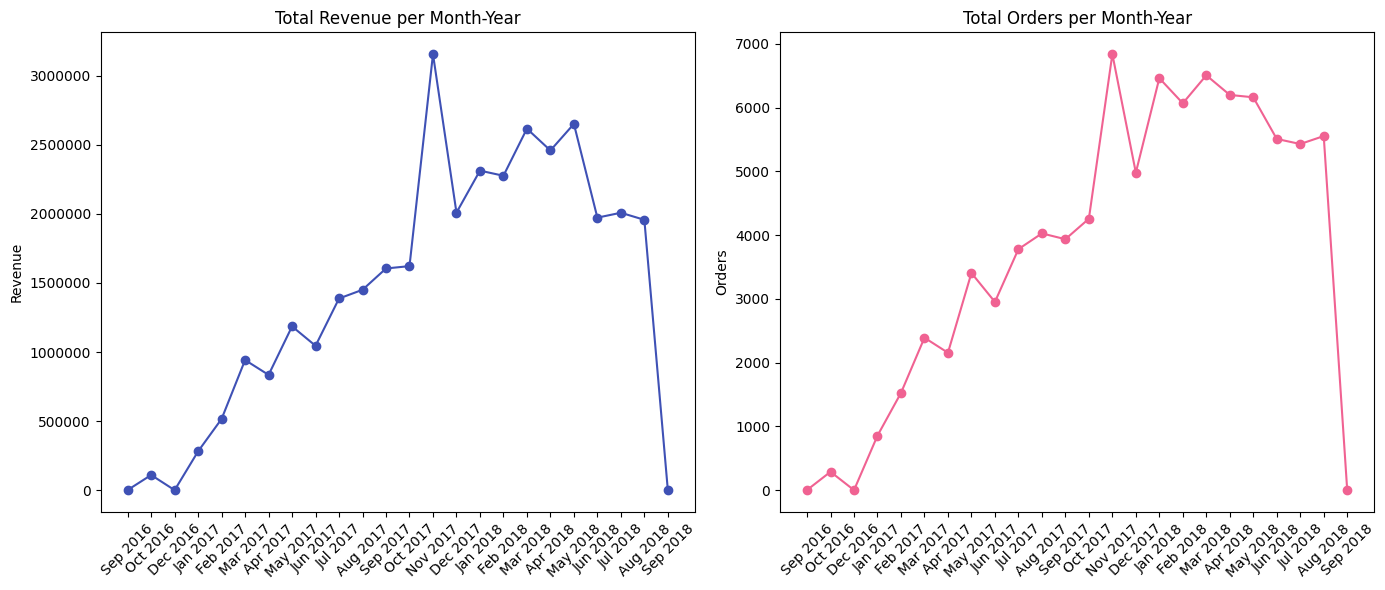

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True)

# --- Grafik Kiri: Total Revenue ---
ax1.plot(order_per_month["month_year"], order_per_month["total_revenue"],
         marker="o", color="#3f51b5", label="Total Revenue")
ax1.set_title("Total Revenue per Month-Year")
ax1.set_ylabel("Revenue")
ax1.tick_params(axis="x", rotation=45)
ax1.ticklabel_format(style='plain', axis='y')

# --- Grafik Kanan: Total Orders ---
ax2.plot(order_per_month["month_year"], order_per_month["total_order"],
         marker="o", color="#f06292", label="Total Orders")
ax2.set_title("Total Orders per Month-Year")
ax2.set_ylabel("Orders")
ax2.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


Bulan Nov 2017 dengan kombinasi total order dan total revenue tertinggi bisa dianggap sebagai bulan terbaik.

# **Customer & Seller Analysis**

### Apakah jumlah customer lebih banyak dibandingkan seller?

In [ ]:
total_customer = df['customer_id'].nunique()
print("Total Customer = ", total_customer)

total_seller = df['seller_id'].nunique()
print("Total Seller = ", total_seller)

Total Customer =  89307
Total Seller =  2929


Ya, jumlah customer jauh lebih banyak dibanding seller. Rasio customer terhadap seller bisa menggambarkan potensi kompetisi antar seller. Semakin besar jumlah customer dibanding seller, peluang seller mendapatkan order akan lebih tinggi. Sebaliknya, jika seller terlalu banyak dengan customer terbatas, persaingan harga bisa makin ketat.

### Siapa saja seller dengan total nilai pembayaran terbesar dan customer dengan pembelian terbanyak?

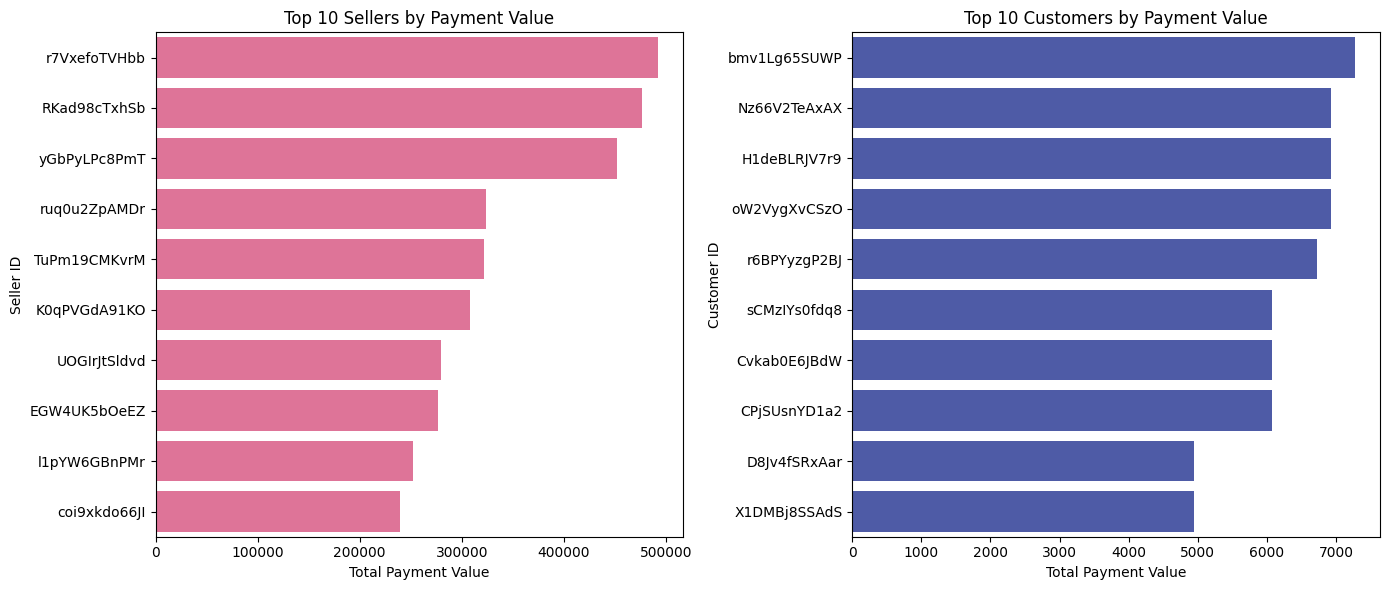

In [ ]:
import seaborn as sns
# --- Hitung total payment per seller & per customer ---
seller_payment = df.groupby("seller_id")["payment_value"].sum().reset_index()
customer_payment = df.groupby("customer_id")["payment_value"].sum().reset_index()

# Ambil Top 10
top10_seller = seller_payment.sort_values("payment_value", ascending=False).head(10)
top10_customer = customer_payment.sort_values("payment_value", ascending=False).head(10)

# --- Plot 2 grafik berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=False)

# Grafik kiri: Seller
sns.barplot(
    data=top10_seller,
    x="payment_value", y="seller_id",
    color="#f06292", ax=axes[0]
)
axes[0].set_title("Top 10 Sellers by Payment Value")
axes[0].set_xlabel("Total Payment Value")
axes[0].set_ylabel("Seller ID")

# Grafik kanan: Customer
sns.barplot(
    data=top10_customer,
    x="payment_value", y="customer_id",
    color="#3f51b5", ax=axes[1]  # warna beda biar kontras
)
axes[1].set_title("Top 10 Customers by Payment Value")
axes[1].set_xlabel("Total Payment Value")
axes[1].set_ylabel("Customer ID")

plt.tight_layout()
plt.show()

### Bagaimana distribusi payment type yang digunakan customer?

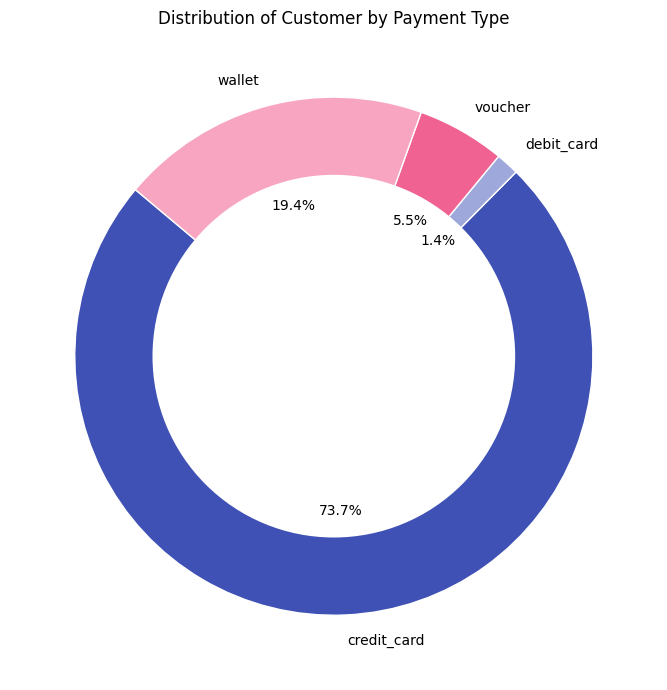

In [ ]:
# --- Hitung total payment per payment_type ---
payment_type = df.groupby("payment_type")["customer_id"].nunique().reset_index()

# --- Warna custom (pink & blue dengan turunan) ---
colors = ["#3f51b5", "#9fa8da",   # blue series
         "#f06292", "#f8a5c2"]   # pink series


# --- Pie chart ---
plt.figure(figsize=(7,7))
plt.pie(
    payment_type["customer_id"],
    labels=payment_type["payment_type"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors[:len(payment_type)], # pakai sesuai jumlah kategori
    wedgeprops={"width":0.4, "edgecolor":"white"}
)

# Tambah lingkaran putih di tengah (opsional biar lebih rapi)
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Customer by Payment Type")
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas terlihat bahwa customer paling menyukai penggunaan credit card dalam pembayaran. Namun customer yang menggunakan debit card paling sedikit dibanding payment type lainnya.

### Bagaimana distribusi nilai pembayaran customer berdasarkan bucket yang sudah ditentukan?

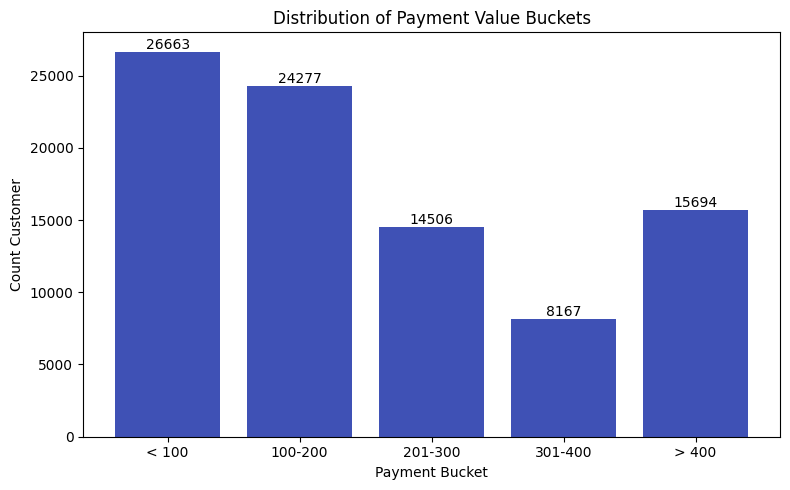

In [ ]:
# --- Buat bucket sesuai case ---
def categorize_payment(val):
    if val < 100:
        return "< 100"
    elif 100 <= val <= 200:
        return "100-200"
    elif 201 <= val <= 300:
        return "201-300"
    elif 301 <= val <= 400:
        return "301-400"
    else:
        return "> 400"

df["payment_bucket"] = df["payment_value"].apply(categorize_payment)

# --- Hitung frekuensi per bucket ---
bucket_count = (
    df.groupby("payment_bucket")["customer_id"]
      .nunique()
      .reindex(["< 100", "100-200", "201-300", "301-400", "> 400"])
      .fillna(0)
)

# --- Bar chart ---
plt.figure(figsize=(8,5))
bars = plt.bar(bucket_count.index, bucket_count.values, color="#3f51b5")

# Tambah label di atas batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.1,
             str(int(bar.get_height())),
             ha="center", va="bottom")

plt.title("Distribution of Payment Value Buckets")
plt.xlabel("Payment Bucket")
plt.ylabel("Count Customer")
plt.tight_layout()
plt.show()

Sebagian besar customer berada pada kategori <100, menandakan transaksi dengan nilai rendah paling dominan. Sementara itu, bucket 301–400 adalah yang paling jarang ditempati customer, menunjukkan segmen menengah cenderung lemah. Bucket >400 masih lebih tinggi dibanding 301–400, artinya ada customer yang rela membayar lebih tinggi, namun jumlahnya tidak banyak.

### Pada hari apa jumlah customer paling banyak melakukan pembelian?

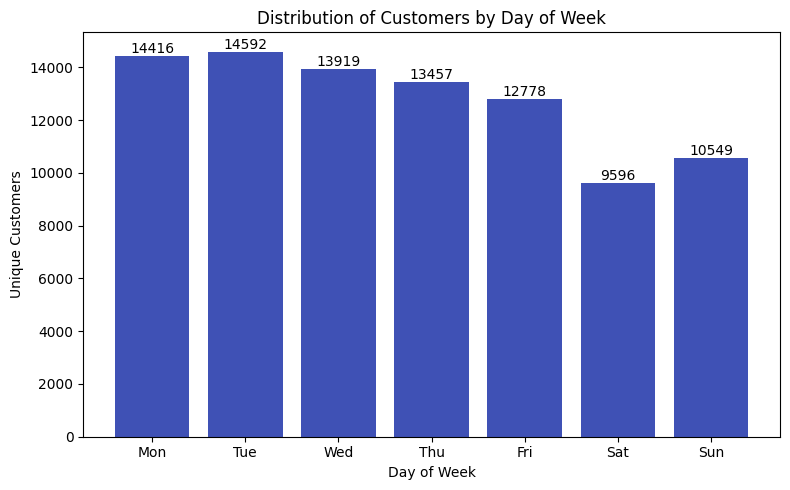

In [ ]:
# --- Tambah kolom hari (Mon, Tue, ...) ---
df["day_of_week"] = df["order_purchase_timestamp"].dt.strftime("%a")

# --- Hitung unique customer per hari ---
day_count = (
    df.groupby("day_of_week")["customer_id"]
      .nunique()
      .reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # urut manual
      .fillna(0)
)

# --- Bar chart ---
plt.figure(figsize=(8,5))
bars = plt.bar(day_count.index, day_count.values, color="#3f51b5")

# Tambah label di atas batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.1,
             str(int(bar.get_height())),
             ha="center", va="bottom")

plt.title("Distribution of Customers by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Unique Customers")
plt.tight_layout()
plt.show()


Grafik menunjukkan distribusi customer unik per hari. Dari hasilnya, terlihat hari Selasa memiliki jumlah customer terbanyak, artinya hari tersebut adalah puncak aktivitas belanja. Sedangkan weeked (Sabtu dan Minggu) paling sedikit customer melakukan pembelian.

### Apa insight dari rasio seller/customer ini terhadap strategi marketplace? Kategori produk mana yang lebih didominasi oleh customer dibanding seller? Kategori produk mana yang memiliki rasio seller lebih tinggi dibanding customer? Kategori produk mana yang memiliki rasio seller sama dibanding customer?

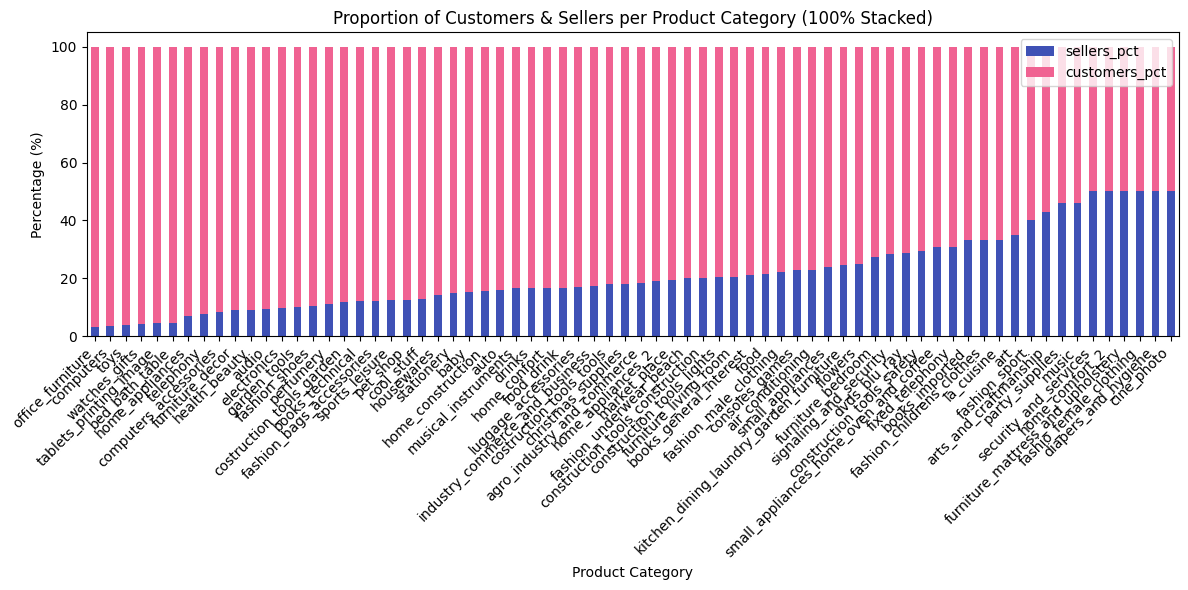

In [ ]:
# --- Hitung unique customer & seller per kategori ---
agg_df = df.groupby("product_category_name").agg(
    unique_customers=("customer_id", "nunique"),
    unique_sellers=("seller_id", "nunique")
).reset_index()

# --- Hitung rasio seller/customer ---
agg_df["seller_customer_ratio"] = agg_df["unique_sellers"] / agg_df["unique_customers"]

# --- Urutkan berdasarkan rasio ---
agg_df = agg_df.sort_values("seller_customer_ratio", ascending=True)

# --- Buat persentase (100% stacked) ---
agg_df["total"] = agg_df["unique_customers"] + agg_df["unique_sellers"]
agg_df["customers_pct"] = agg_df["unique_customers"] / agg_df["total"] * 100
agg_df["sellers_pct"]   = agg_df["unique_sellers"] / agg_df["total"] * 100

# --- Plot stacked 100% ---
agg_df.set_index("product_category_name")[["sellers_pct", "customers_pct"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["#3f51b5", "#f06292"]
)

plt.title("Proportion of Customers & Sellers per Product Category (100% Stacked)")
plt.xlabel("Product Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Jika customer ≫ seller → artinya kategori sedang under-supply, marketplace bisa mendorong lebih banyak seller masuk (misalnya lewat campaign rekrut penjual).

Jika seller ≫ customer → artinya kategori sedang over-supply, marketplace bisa membantu seller lewat fitur promosi, iklan berbayar, atau segmentasi agar tidak kehilangan daya saing.

Rasio seimbang → menandakan pasar yang sehat.

Kategori produk office furnitur yang lebih didominasi oleh customer dibanding seller. Tidak ada kategori produk yang memiliki rasio seller lebih tinggi dibanding customer. KAtegori produk yang memiliki rasio sama antara seller dan customer adalah security_and_service, home_comfort_2, furniture_mattress_and_upholstery, diapers_and_hygiene dan cine_photo.

# **Logictics & Delivery Analysis**

### Bagaimana distribusi order berdasarkan status pengiriman? Apakah mayoritas order dikirim tepat waktu atau sering terlambat?

In [ ]:
# --- Buat kolom status delivery mirip CASE ---
def categorize_status(row):
    if row["order_status"] == "delivered":
        if row["order_delivered_timestamp"] <= row["order_estimated_delivery_date"]:
            return "Order On Time"
        else:
            return "Order Late"
    elif row["order_status"] in ["canceled", "unavailable"]:
        return "Order Canceled"
    else:
        return "Order Pending"

df["delivery_status"] = df.apply(categorize_status, axis=1)

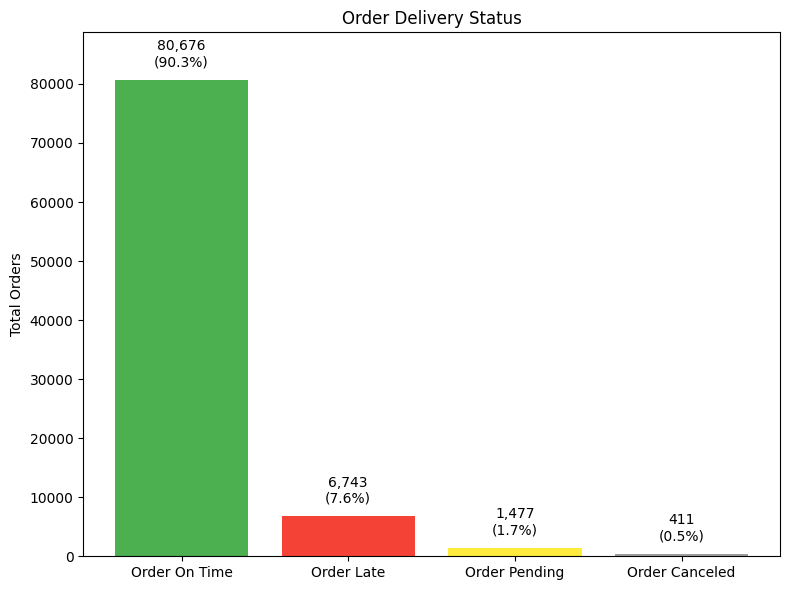

In [ ]:
# --- Hitung jumlah per status ---
status_count = df["delivery_status"].value_counts()
total = status_count.sum()

# --- Warna tiap status ---
colors = {
    "Order On Time": "#4caf50",     # Hijau
    "Order Late": "#f44336",        # Merah
    "Order Pending": "#ffeb3b",     # Kuning
    "Order Canceled": "#9e9e9e"  # Abu-abu
}


# --- Bar chart ---
plt.figure(figsize=(8,6))
bars = plt.bar(status_count.index, status_count.values,
               color=[colors[s] for s in status_count.index])

# Tambah label jumlah & persen
for bar, status in zip(bars, status_count.index):
    value = bar.get_height()
    percent = (value / total) * 100 if total > 0 else 0
    plt.text(bar.get_x() + bar.get_width()/2,
             value + (total * 0.02),   # lebih tinggi sedikit
             f"{value:,}\n({percent:.1f}%)",
             ha="center", va="bottom", fontsize=10)

plt.title("Order Delivery Status")
plt.ylabel("Total Orders")
plt.ylim(0, status_count.max() * 1.1)
plt.tight_layout()
plt.show()


Dengan menghitung frekuensi delivery_status, 90.3% order yang tepat waktu, 7.6% terlambat, 0.5% dibatalkan, dan 1.7% masih pending. Porsi Order On Time lebih dominan → sistem logistik marketplace berjalan baik.

### Apa insight bisnis dari hasil ini?

In [ ]:
approve_days = (df['order_approved_at']-df['order_purchase_timestamp']).mean()
print('Rata-rata approve days: ', approve_days)

delivery_days = (df['order_delivered_timestamp']-df['order_approved_at']).mean()
print('Rata-rata deivery days: ', delivery_days)


Rata-rata approve days:  0 days 10:25:52.970439047
Rata-rata deivery days:  12 days 00:03:11.207154133


Jika approve cepat (misalnya hitungan menit/jam) → bagus, proses order tidak membuat customer menunggu lama.

Jika delivery lama (misalnya > 10 hari) → bisa jadi masalah di proses pengiriman/logistik

### Kota mana saja yang memiliki jumlah order terbanyak? Kota mana yang memiliki tingkat keterlambatan paling tinggi?

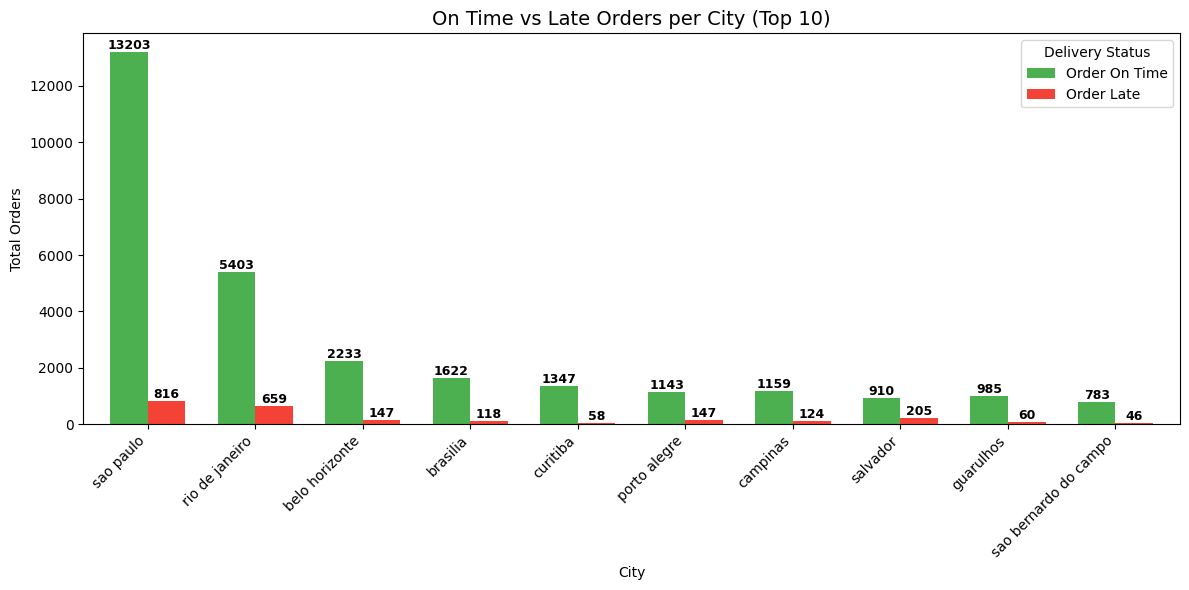

In [ ]:
# --- Hitung jumlah order On Time & Late per city ---
city_status = (
    df[df["delivery_status"].isin(["Order On Time", "Order Late"])]
      .groupby(["customer_city", "delivery_status"])
      .size()
      .unstack(fill_value=0)   # jadi kolom "Order On Time" & "Order Late"
      .reset_index()
)

# --- Sort by total order & ambil top 10 city ---
city_status["total"] = city_status["Order On Time"] + city_status["Order Late"]
city_status = city_status.sort_values("total", ascending=False).head(10)

# --- Plot bar ---
ax = city_status.set_index("customer_city")[["Order On Time", "Order Late"]].plot(
    kind="bar", figsize=(12,6), width=0.7,
    color={"Order On Time":"#4caf50", "Order Late":"#f44336"}
)

# --- Tambah label di atas masing-masing bar ---
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9, fontweight="bold")

plt.title("On Time vs Late Orders per City (Top 10)", fontsize=14)
plt.ylabel("Total Orders")
plt.xlabel("City")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Delivery Status")
plt.tight_layout()
plt.show()


Dari grafik terlihat bahwa Sao Paulo memiliki jumlah order terbanyak. Namun memiliki persentase Order Late lebih besar dibanding kota lain. Hal ini bisa jadi karena jarak logistik, infrastruktur pengiriman, atau volume order yang tinggi.

### Bagaimana distribusi pengiriman On Time dan Late per kategori?

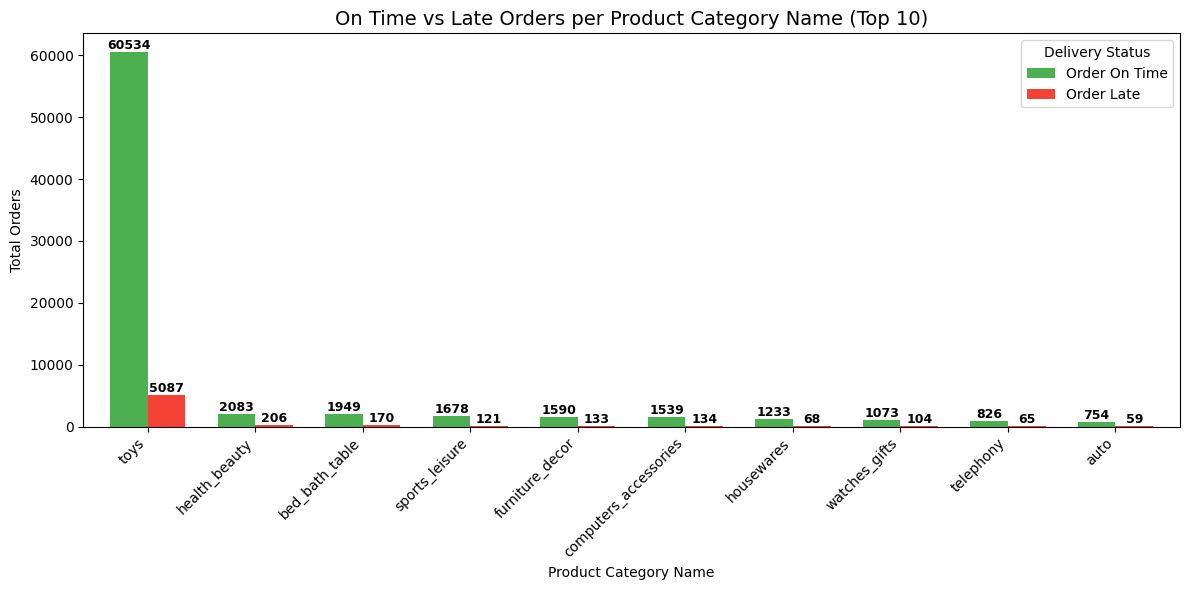

In [ ]:
# --- Hitung jumlah order On Time & Late per city ---
city_status = (
    df[df["delivery_status"].isin(["Order On Time", "Order Late"])]
      .groupby(["product_category_name", "delivery_status"])
      .size()
      .unstack(fill_value=0)   # jadi kolom "Order On Time" & "Order Late"
      .reset_index()
)

# --- Sort by total order & ambil top 10 city ---
city_status["total"] = city_status["Order On Time"] + city_status["Order Late"]
city_status = city_status.sort_values("total", ascending=False).head(10)

# --- Plot bar ---
ax = city_status.set_index("product_category_name")[["Order On Time", "Order Late"]].plot(
    kind="bar", figsize=(12,6), width=0.7,
    color={"Order On Time":"#4caf50", "Order Late":"#f44336"}
)

# --- Tambah label di atas masing-masing bar ---
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9, fontweight="bold")

plt.title("On Time vs Late Orders per Product Category Name (Top 10)", fontsize=14)
plt.ylabel("Total Orders")
plt.xlabel("Product Category Name")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Delivery Status")
plt.tight_layout()
plt.show()


Sebagian besar kategori memiliki jumlah On Time lebih tinggi daripada Late. Toys memiliki jumlah order terbanyak namun memiliki persentase Order Late lebih besar dibanding kategori produk lainnya.

### Kota mana dengan rata-rata pengiriman tercepat?

In [ ]:
# Buat kolom delivery_days per order
df["delivery_days"] = (df["order_delivered_timestamp"] - df["order_approved_at"]).dt.days

# Hitung rata-rata delivery_days per kota
city_delivery = (
    df.groupby("customer_city")["delivery_days"]
      .mean()
      .reset_index()
)

# Ambil 13 kota dengan rata-rata tercepat
city_delivery = city_delivery.sort_values("delivery_days", ascending=True).head(13)

# Tampilkan tabel
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.0f}".format)

city_delivery


,customer_city,delivery_days
1516,iomere,2
2767,quitandinha,2
932,contenda,3
2083,meridiano,3
2493,pedra bela,3
3257,sao pedro de alcantara,3
19,acucena,3
3383,siriji,3
1255,frei gaspar,4
599,cambara do sul,4


Kota Iomere dan Quitandinha	merupakan kota dengan rata-rata pengiriman tercepat yaitu 2 hari.

### Kategori produk mana dengan rata-rata pengiriman tercepat?

In [ ]:
# Buat kolom delivery_days per order
df["delivery_days"] = (df["order_delivered_timestamp"] - df["order_approved_at"]).dt.days

# Hitung rata-rata delivery_days per kota
product_delivery = (
    df.groupby("product_category_name")["delivery_days"]
      .mean()
      .reset_index()
)

# Ambil 13 kota dengan rata-rata tercepat
product_delivery = product_delivery.sort_values("delivery_days", ascending=True).head(13)

# Tampilkan tabel
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.0f}".format)

product_delivery


,product_category_name,delivery_days
3,arts_and_craftmanship,4
63,small_appliances_home_oven_and_coffee,6
57,party_supplies,6
45,home_comfort_2,7
51,la_cuisine,8
61,signaling_and_security,8
4,audio,8
21,costruction_tools_tools,8
26,fashio_female_clothing,8
17,construction_tools_lights,9


Kategori arts_and_craftmanship	merupakan kategori produk dengan rata-rata pengiriman tercepat yaitu 4 hari.